## Given Base Code

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [30]:
regr= X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target,random_state=1)
regr = MLPRegressor(hidden_layer_sizes=(5,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=200, shuffle=True, random_state=1, verbose=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
regr.fit(X_train, y_train)

print(regr.predict(X_test[:10]))
print(y_test[:10])
print(regr.score(X_test, y_test))

[2.67355308 1.82332745 3.25197645 1.31313821 3.17947449 3.6921492
 2.98255533 1.91408749 2.32691441 2.0609405 ]
[3.55  0.707 2.294 1.125 2.254 2.63  2.268 1.662 1.18  1.563]
-0.47669787835464295


In [58]:
housing = fetch_california_housing()
X = housing.data
y = housing.target
# Split the dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1)

## **Question 1:** Experimenting with ANN Configurations
##1. Effect of Changing Number of Layers
 We will run experiments by varying the number of layers. For simplicity, let’s test configurations with 1, 2, and 3 hidden layers:

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


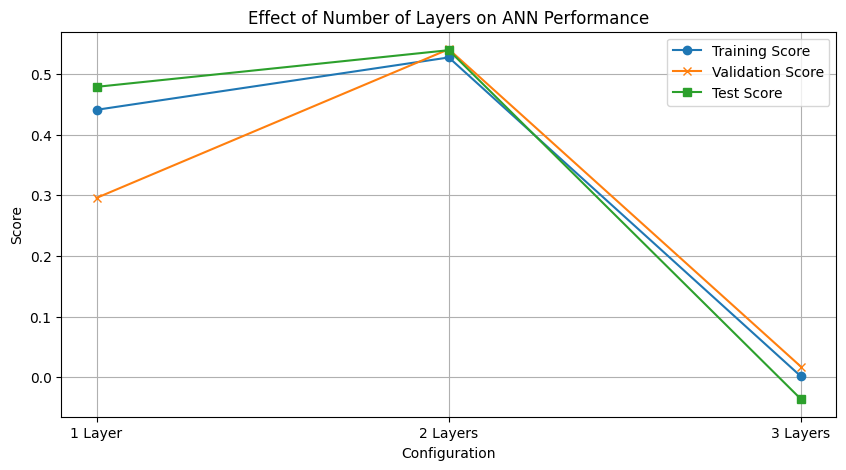

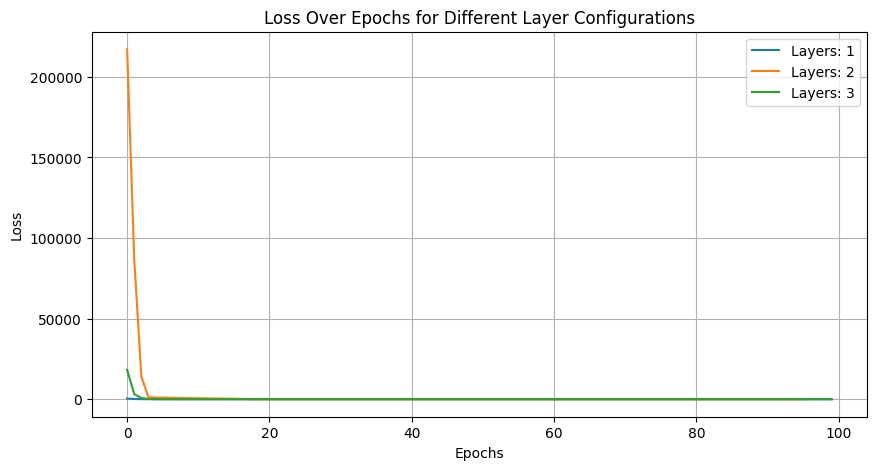

In [84]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training + validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1)

def experiment_layers(layers_list):
    train_scores = []
    val_scores = []
    test_scores = []
    loss_values = []

    for layers in layers_list:
        regr = MLPRegressor(hidden_layer_sizes=layers,
                            activation='relu',
                            solver='adam',
                            alpha=0.0001,
                            batch_size='auto',
                            learning_rate='constant',
                            learning_rate_init=0.001,
                            max_iter=100,
                            shuffle=True,
                            random_state=1,
                            verbose=False,
                            momentum=0.9,
                            nesterovs_momentum=True,
                            early_stopping=False,
                            validation_fraction=0.1,
                            beta_1=0.9,
                            beta_2=0.999,
                            epsilon=1e-08,
                            n_iter_no_change=10)

        regr.fit(X_train, y_train)
        train_scores.append(regr.score(X_train, y_train))
        val_scores.append(regr.score(X_val, y_val))
        test_scores.append(regr.score(X_test, y_test))

        # Capture loss values for plotting
        loss_values.append(regr.loss_curve_)

    return train_scores, val_scores, test_scores, loss_values

# Defining configurations for 1, 2, and 3 hidden layers
layers_list = [(5,), (5, 5), (5, 5, 5)]
train_scores, val_scores, test_scores, loss_values = experiment_layers(layers_list)

# Plotting scores
plt.figure(figsize=(10, 5))
plt.plot(['1 Layer', '2 Layers', '3 Layers'], train_scores, label='Training Score', marker='o')
plt.plot(['1 Layer', '2 Layers', '3 Layers'], val_scores, label='Validation Score', marker='x')
plt.plot(['1 Layer', '2 Layers', '3 Layers'], test_scores, label='Test Score', marker='s')
plt.title('Effect of Number of Layers on ANN Performance')
plt.xlabel('Configuration')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Plotting loss values
plt.figure(figsize=(10, 5))
for i, layers in enumerate(layers_list):
   plt.plot(loss_values[i], label=f'Layers: {i + 1}')

plt.title('Loss Over Epochs for Different Layer Configurations')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


# 2. Effect of Changing Number of Neurons
Next, we will vary the number of neurons in a single layer (e.g., 5, 10, 20):

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


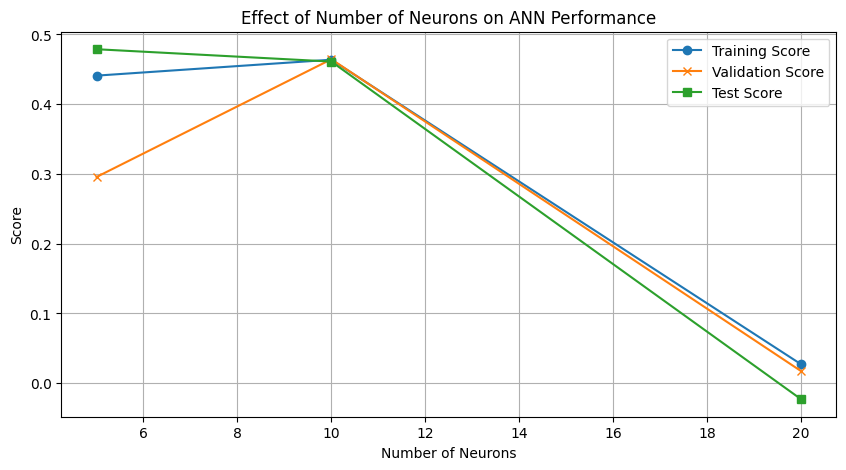

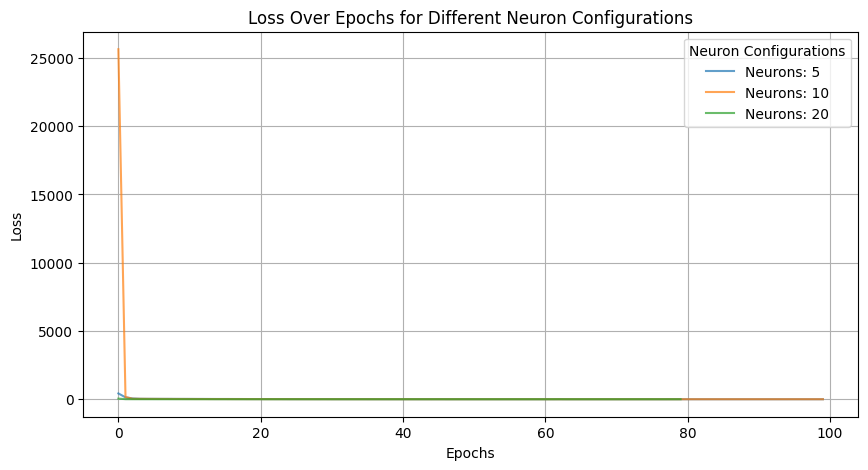

In [85]:
def train_and_evaluate_neurons(neurons):
    regr = MLPRegressor(hidden_layer_sizes=(neurons,),
                        activation='relu',
                        solver='adam',
                        alpha=0.0001,
                        batch_size='auto',
                        learning_rate='constant',
                        learning_rate_init=0.001,
                        max_iter=100,
                        shuffle=True,
                        random_state=1,
                        verbose=False,
                        momentum=0.9,
                        nesterovs_momentum=True,
                        early_stopping=False,
                        validation_fraction=0.1,
                        beta_1=0.9,
                        beta_2=0.999,
                        epsilon=1e-08,
                        n_iter_no_change=10)

    regr.fit(X_train, y_train)

    # Calculate scores
    train_score = regr.score(X_train, y_train)
    val_score = regr.score(X_val, y_val)
    test_score = regr.score(X_test, y_test)

    # Capture loss at each epoch
    loss_values = regr.loss_curve_  # This gives the loss at each iteration
    return train_score, val_score, test_score, loss_values

# List of neurons to test
neurons_list = [5, 10, 20]
train_scores_neurons = []
val_scores_neurons = []
test_scores_neurons = []
loss_values_list = []

# Evaluate model for different neuron configurations
for n in neurons_list:
    train_score, val_score, test_score, loss_values = train_and_evaluate_neurons(n)
    train_scores_neurons.append(train_score)
    val_scores_neurons.append(val_score)
    test_scores_neurons.append(test_score)
    loss_values_list.append(loss_values)

# Plotting scores
plt.figure(figsize=(10, 5))
plt.plot(neurons_list, train_scores_neurons, label='Training Score', marker='o')
plt.plot(neurons_list, val_scores_neurons, label='Validation Score', marker='x')
plt.plot(neurons_list, test_scores_neurons, label='Test Score', marker='s')
plt.title('Effect of Number of Neurons on ANN Performance')
plt.xlabel('Number of Neurons')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Plotting loss values
plt.figure(figsize=(10, 5))
for i, loss_values in enumerate(loss_values_list):
    plt.plot(loss_values, label=f'Neurons: {neurons_list[i]}', alpha=0.7)

plt.title('Loss Over Epochs for Different Neuron Configurations')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(title='Neuron Configurations')
plt.grid()
plt.show()

#3. Effect of Changing Activation Functions
Now, let’s test different activation functions (e.g., 'relu', 'identity', 'tanh', 'logistic'):

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


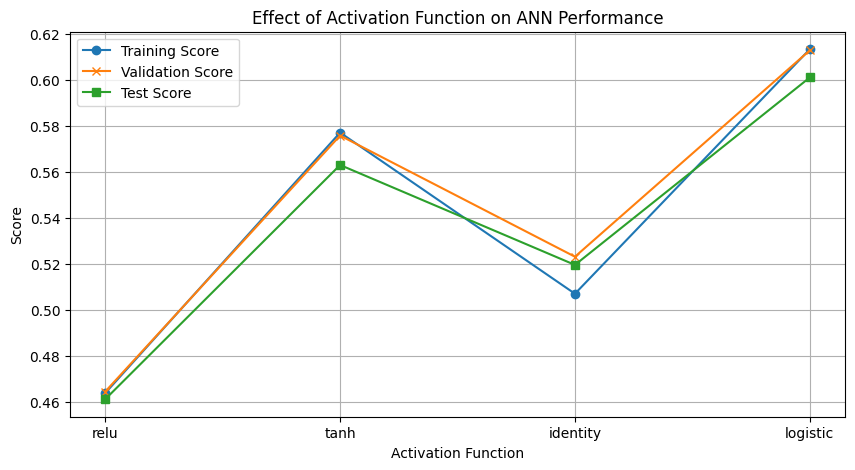

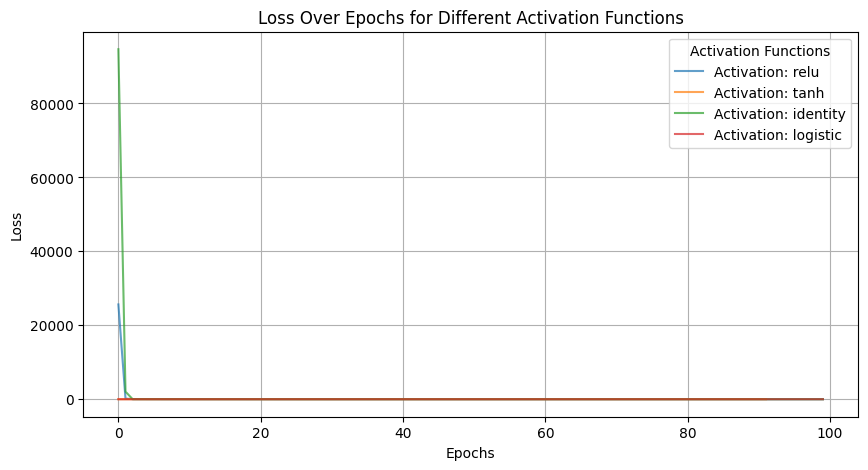

In [86]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

def experiment_activation(activation_list):
    train_scores = []
    val_scores = []
    test_scores = []
    loss_values_list = []

    for activation in activation_list:
        regr = MLPRegressor(hidden_layer_sizes=(10,),
                            activation=activation,
                            solver='adam',
                            alpha=0.0001,
                            batch_size='auto',
                            learning_rate='constant',
                            learning_rate_init=0.001,
                            max_iter=100,
                            shuffle=True,
                            random_state=1,
                            verbose=False,
                            momentum=0.9,
                            nesterovs_momentum=True,
                            early_stopping=False,
                            validation_fraction=0.1,
                            beta_1=0.9,
                            beta_2=0.999,
                            epsilon=1e-08,
                            n_iter_no_change=10)

        regr.fit(X_train, y_train)  # Fit the model on training data
        train_scores.append(regr.score(X_train, y_train))  # Training score
        val_scores.append(regr.score(X_val, y_val))  # Validation score
        test_scores.append(regr.score(X_test, y_test))  # Test score
        loss_values_list.append(regr.loss_curve_)  # Capture loss values

    return train_scores, val_scores, test_scores, loss_values_list

# List of activation functions to test
activation_list = ['relu', 'tanh', 'identity', 'logistic']
train_scores, val_scores, test_scores, loss_values_list = experiment_activation(activation_list)

# Plotting results for scores
plt.figure(figsize=(10, 5))
plt.plot(activation_list, train_scores, label='Training Score', marker='o')
plt.plot(activation_list, val_scores, label='Validation Score', marker='x')
plt.plot(activation_list, test_scores, label='Test Score', marker='s')
plt.title('Effect of Activation Function on ANN Performance')
plt.xlabel('Activation Function')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Plotting loss values
plt.figure(figsize=(10, 5))
for i, loss_values in enumerate(loss_values_list):
    plt.plot(loss_values, label=f'Activation: {activation_list[i]}', alpha=0.7)

plt.title('Loss Over Epochs for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(title='Activation Functions')
plt.grid()
plt.show()


#Question 2: Implementing Different Optimizers
For this experiment, we will implement different optimizers and compare their performance. For simplicity, we will use the configurations from the previous experiment with 5 neurons and 1 hidden layer.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


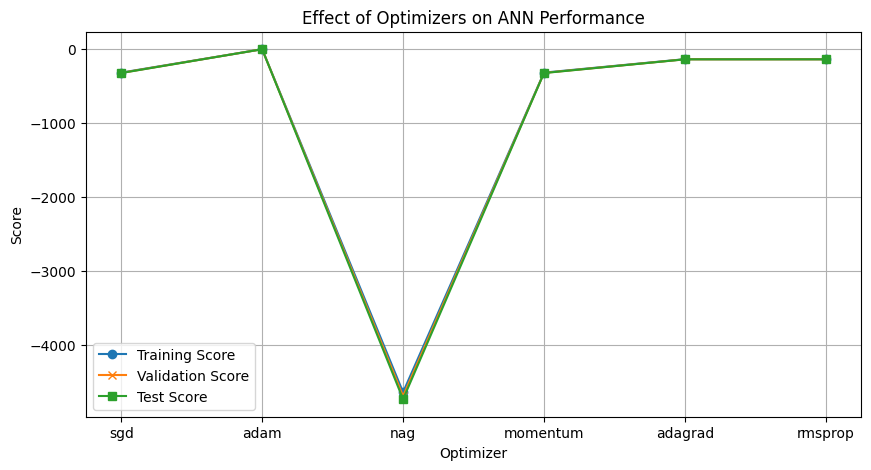

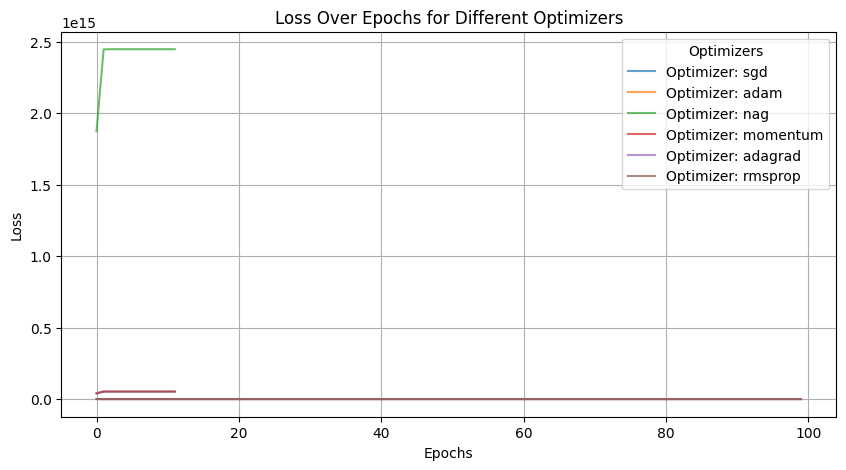

In [88]:
def experiment_optimizers(optimizer_list):
    train_scores = []
    val_scores = []
    test_scores = []
    loss_values_list = []

    for optimizer in optimizer_list:
        # Configure parameters based on optimizer otherwise I am getting error
        if optimizer == 'nag':
            solver = 'sgd'
            nesterovs_momentum = True
            momentum = 0.9
            learning_rate = 'constant'
        elif optimizer == 'momentum':
            solver = 'sgd'
            nesterovs_momentum = False
            momentum = 0.9
            learning_rate = 'constant'
        elif optimizer == 'adagrad':
            solver = 'sgd'
            nesterovs_momentum = False
            momentum = 0.0  # AdaGrad doesn't use momentum
            learning_rate = 'adaptive'
        elif optimizer == 'rmsprop':
            solver = 'sgd'
            nesterovs_momentum = False
            momentum = 0.0  # RMSProp doesn't use momentum
            learning_rate = 'adaptive'
        else:
            solver = optimizer
            nesterovs_momentum = False
            momentum = 0.9
            learning_rate = 'constant'

        regr = MLPRegressor(hidden_layer_sizes=(5,),
                            activation='relu',
                            solver=solver,
                            alpha=0.0001,
                            batch_size='auto',
                            learning_rate=learning_rate,
                            learning_rate_init=0.001,
                            max_iter=100,
                            shuffle=True,
                            random_state=1,
                            verbose=False,
                            momentum=momentum,
                            nesterovs_momentum=nesterovs_momentum,
                            early_stopping=False,
                            validation_fraction=0.1,
                            beta_1=0.9,
                            beta_2=0.999,
                            epsilon=1e-08,
                            n_iter_no_change=10)

        regr.fit(X_train, y_train)

        # Calculate scores
        train_scores.append(regr.score(X_train, y_train))
        val_scores.append(regr.score(X_val, y_val))
        test_scores.append(regr.score(X_test, y_test))
        loss_values_list.append(regr.loss_curve_)  # Capture loss values

    return train_scores, val_scores, test_scores, loss_values_list

# List of optimizers to test
optimizer_list = ['sgd', 'adam', 'nag', 'momentum', 'adagrad', 'rmsprop']

# Run the experiment
train_scores, val_scores, test_scores, loss_values_list = experiment_optimizers(optimizer_list)

# Plotting results for scores
plt.figure(figsize=(10, 5))
plt.plot(optimizer_list, train_scores, label='Training Score', marker='o')
plt.plot(optimizer_list, val_scores, label='Validation Score', marker='x')
plt.plot(optimizer_list, test_scores, label='Test Score', marker='s')
plt.title('Effect of Optimizers on ANN Performance')
plt.xlabel('Optimizer')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Plotting loss/costs values
plt.figure(figsize=(10, 5))
for i, loss_values in enumerate(loss_values_list):
    plt.plot(loss_values, label=f'Optimizer: {optimizer_list[i]}', alpha=0.7)

plt.title('Loss Over Epochs for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(title='Optimizers')
plt.grid()
plt.show()